## 1 Robot2
- Q1.1 Implement a KNN classifier.
- Q1.2 Report precision, recall, f1 score and accuracy.
- Q1.3 Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm.(10 points)

- Q2.1 Use different distance measures as applicable. 
- Q2.2 Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.datatools import train_test_split
from utils.metrics import precision, recall, f1_score, accuracy
from utils.distance_measures import *
from utils.plotter import *

from utils.knn import get_k_nearest_neighbours, best_class, classify_example, predict

### Read csv file

In [2]:
def read_csv(file_path):
    df = pd.read_csv(file_path, header=None, sep=' ').dropna(axis=1, how='all')
    # add column names header
    df.columns = ["class", "a1", "a2", "a3", "a4", "a5", "a6", "Id"]

    # we do not need Id column
    df.drop(['Id'], axis=1, inplace=True)

    # make class label the last column 
    cols = df.columns.tolist()
    cols.remove("class")
    df = df[cols +["class"]]

    target = "label"
    # rename the column whose value is to be predicted to "label"
    df = df.rename(columns={"class": target}) 

    df.head(3)
    
    return df
    
df = read_csv("../data/robot/Robot2")

# Q1.1 Implement a KNN classifier.

In [3]:
number_of_neighbours = 7

train_df, validate_df = train_test_split(df, test_size = 0.2, random_state=1)

predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=euclidean_distance)

actual = validate_df["label"]

combined_df = pd.concat([actual, predictions],axis=1)



 # Q1.2 Report precision, recall, f1_score and accuracy

precision 0.9285714285714286
recall 0.8125
f1_score 0.8666666666666666
accuracy 0.8333333333333334


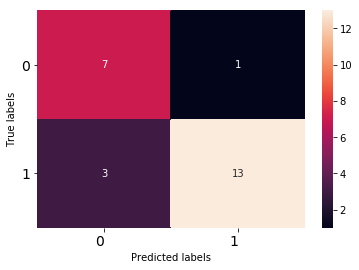

In [4]:
print("precision", precision(combined_df, 1))

print("recall", recall(combined_df, 1))

print("f1_score", f1_score(combined_df, 1))

print("accuracy", accuracy(combined_df))

plot_confusion_heatmap(combined_df, xticks_rotation=0)

# Q1.3 Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm

# Comparison with sklearn

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, y_train = train_df.drop(["label"], axis=1), train_df["label"]
X_test, y_test = validate_df.drop(["label"], axis=1), validate_df["label"]

model = KNeighborsClassifier(n_neighbors=number_of_neighbours)

# Train the model using the training set
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# Report accuracy
accuracy_score(y_test, y_pred)

0.8333333333333334

# Q2.1 Use different distance measures as applicable.

## Using euclidean distance

In [6]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=euclidean_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 0.8333333333333334


## Using Manhattan distance

In [7]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=manhattan_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 0.6666666666666666


## Using Chebyshev distance

In [8]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=chebyshev_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 0.75


## Using Cosine distance

In [9]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=cosine_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 0.7083333333333334


### Plot for sklearn model

1 0.875;	2 0.7916666666666666;	3 0.875;	4 0.7916666666666666;	5 0.8333333333333334;	6 0.75;	7 0.8333333333333334;	8 0.6666666666666666;	9 0.75;	


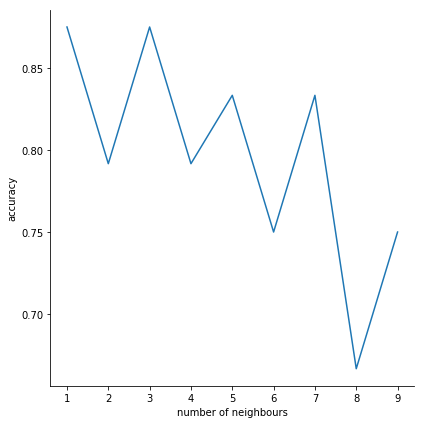

In [10]:
from math import sqrt, floor
accuracies = []
n_samples = floor(sqrt(len(train_df)))
X_train, y_train = train_df.drop(["label"], axis=1), train_df["label"]
X_test, y_test = validate_df.drop(["label"], axis=1), validate_df["label"]

for k in range(1, n_samples+1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    print(k, accu, end=";\t")
    accuracies.append((k, accu))

print()
plotdf = pd.DataFrame(accuracies, index=range(n_samples), columns=["number of neighbours", "accuracy"])
sns.relplot( y="accuracy", x="number of neighbours", kind="line", data=plotdf, height=6)


# Q2.2 Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

### Plot for our KNN implementation

1 0.8333333333333334;	2 0.8333333333333334;	3 0.7916666666666666;	4 0.75;	5 0.8333333333333334;	6 0.75;	7 0.8333333333333334;	8 0.7083333333333334;	9 0.7083333333333334;	


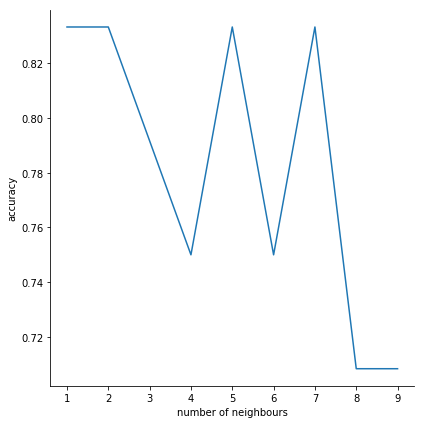

In [11]:
from math import sqrt, floor
accuracies = []
n_samples = floor(sqrt(len(train_df)))

for k in range(1, n_samples + 1):
    predictions = predict(validate_df, train_df, k, euclidean_distance)
    actual = validate_df["label"]
    combined_df = pd.concat([actual, predictions], axis=1)
    accu = accuracy(combined_df)
    print(k, accu, end=";\t")
    accuracies.append((k, accu))
    
print()
plotdf = pd.DataFrame(accuracies, index=range(n_samples), columns=["number of neighbours", "accuracy"])
sns.relplot( y="accuracy", x="number of neighbours", kind="line", data=plotdf, height=6)


# Load test data from supplied command line path

In [12]:
import sys
if len(sys.argv) != 2:
    print("Please supply test file path")
    exit(1)

test_file_path = sys.argv[1]
print("Loading test data from:", test_file_path)


Please supply test file path
Loading test data from: -f


precision 1.0
recall 0.7333333333333333
f1_score 0.846153846153846
accuracy 0.8688524590163934


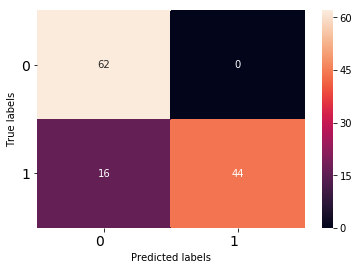

In [13]:
# STOPSHIP
if test_file_path == "-f":
    test_file_path = "../data/robot/Robot2"
    
test_df = read_csv(test_file_path)

predictions = predict(test_df, train_df, 5, cosine_distance)
actual = test_df["label"]
combined_df = pd.concat([actual, predictions], axis=1)


print("precision", precision(combined_df, 1))

print("recall", recall(combined_df, 1))

print("f1_score", f1_score(combined_df, 1))

print("accuracy", accuracy(combined_df))

plot_confusion_heatmap(combined_df, xticks_rotation=0)